<a href="https://colab.research.google.com/github/sudhatisaipavan/23CSBTB27-28/blob/main/house_price_predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import needed liberarirs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

# New Section

read data

In [ ]:
df = pd.read_csv('Housing.csv') # Assuming 'Housing.csv' is in the same directory as your notebook
df.sample(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
254,4480000,4510,4,1,2,yes,no,no,no,yes,2,no,semi-furnished
58,7210000,7680,4,2,4,yes,yes,no,no,yes,1,no,semi-furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished
154,5530000,3650,3,2,2,yes,no,no,no,no,2,no,semi-furnished
174,5250000,3800,3,1,2,yes,yes,yes,no,no,1,yes,unfurnished
149,5600000,6600,4,2,1,yes,no,yes,no,no,0,yes,semi-furnished
219,4795000,7000,3,1,2,yes,no,yes,no,no,0,no,unfurnished
386,3535000,3850,3,1,1,yes,no,no,no,no,2,no,unfurnished
462,3080000,2160,3,1,2,no,no,yes,no,no,0,no,semi-furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


data visualization

In [ ]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count

,count
bedrooms,
3,300
2,136
4,95
5,10
6,2
1,2


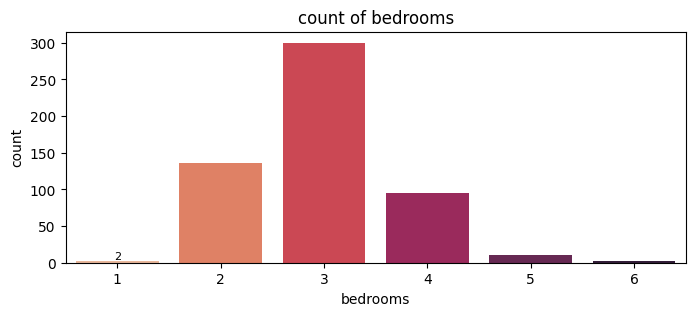

In [ ]:
plt.figure(figsize=(8,3))
ax=sns.barplot(x=bedrooms_count.index, y=bedrooms_count.values,palette="rocket_r")
ax.bar_label(ax.containers[0], fontsize=8);
plt.title('count of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
plt.show()

In [ ]:
count_bathrooms = df['bathrooms'].value_counts()
count_bathrooms

,count
bathrooms,
1,401
2,133
3,10
4,1


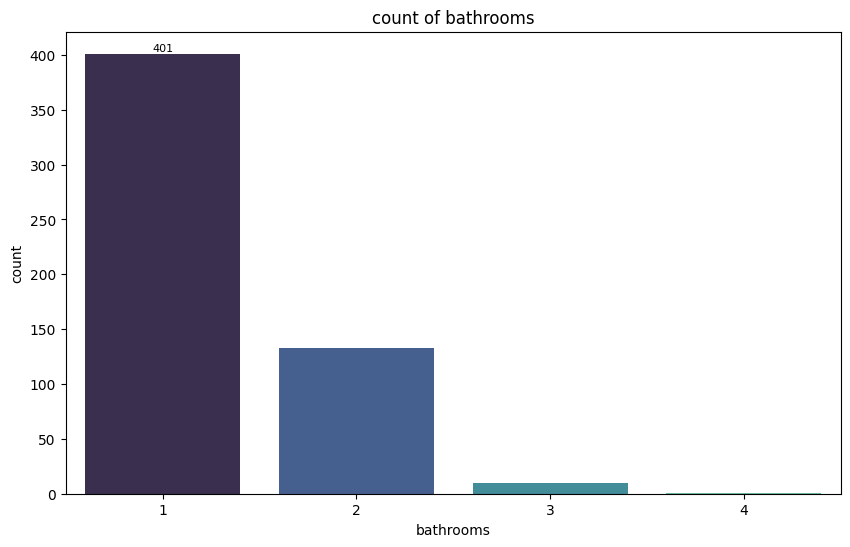

In [ ]:
ax = sns.barplot(x=count_bathrooms.index,y=count_bathrooms.values,palette="mako")
ax.bar_label(ax.containers[0], fontsize=8);
plt.title('count of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('count')
plt.show()

In [ ]:
stories_count = df['stories'].value_counts()
stories_count

,count
stories,
2,238
1,227
4,41
3,39


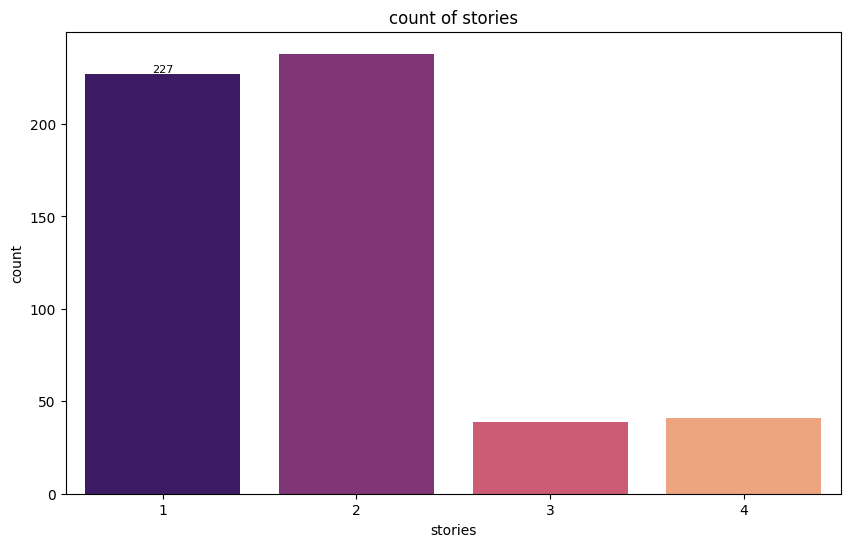

In [ ]:
ax = sns.barplot(x=stories_count.index,y=stories_count.values,palette="magma")
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('count of stories')
plt.xlabel('stories')
plt.ylabel('count')
plt.show()

In [ ]:
count_mainroad=df['mainroad'].value_counts()
count_mainroad

,count
mainroad,
yes,468
no,77


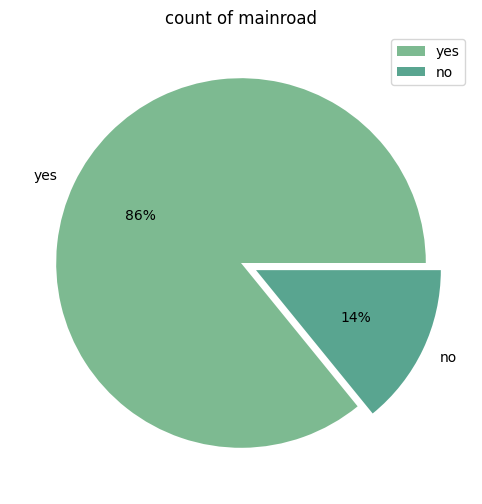

In [ ]:
explode = [0, 0.09]
colors = sns.color_palette("crest")
plt.pie(count_mainroad.values,
        labels=count_mainroad.index,
        autopct='%.0f%%',explode=explode,
        colors = colors)
plt.title("count of mainroad")
plt.legend(loc = "best")

plt.show()

In [ ]:
guestroom_count = df['guestroom'].value_counts()
guestroom_count

,count
guestroom,
no,448
yes,97


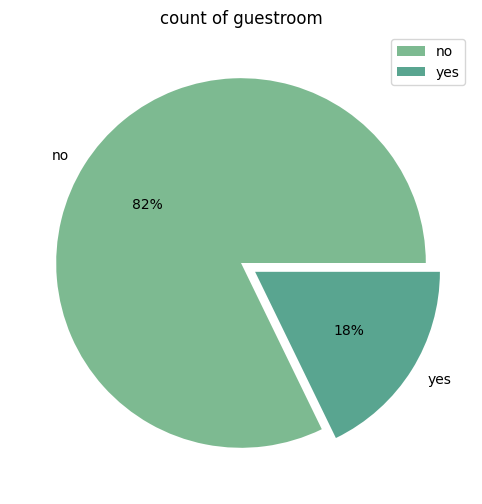

In [ ]:
explode = [0, 0.09]
colors = sns.color_palette("crest")
plt.pie(guestroom_count.values,
        labels=guestroom_count.index,
        autopct='%.0f%%',explode=explode,
        colors = colors)
plt.title("count of guestroom")
plt.legend(loc = "best")

plt.show()

In [ ]:
furnishingstatus_count = df.furnishingstatus.value_counts()
furnishingstatus_count

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


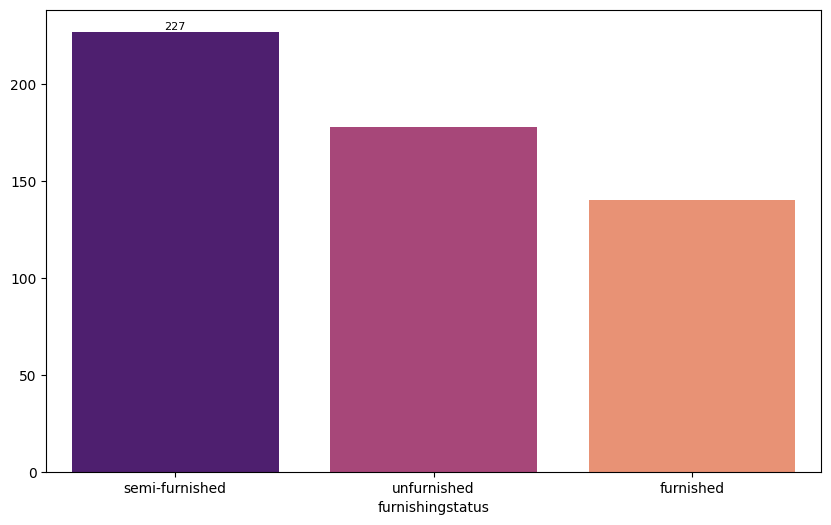

In [ ]:
ax = sns.barplot(x=furnishingstatus_count.index,
                 y=furnishingstatus_count.values,
                 palette="magma"

                )
ax.bar_label(ax.containers[0], fontsize=8)
plt.show()

In [ ]:
prefarea_count = df.prefarea.value_counts()
prefarea_count

,count
prefarea,
no,417
yes,128


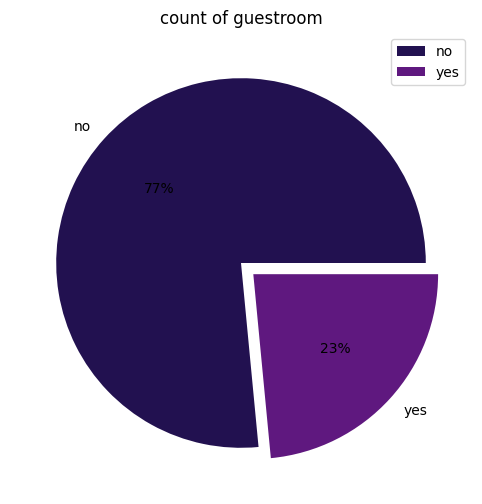

In [ ]:
explode = [0, 0.09]
colors = sns.color_palette("magma")
plt.pie(prefarea_count.values,
        labels=prefarea_count.index,
        autopct='%.0f%%',explode=explode,
        colors = colors)
plt.title("count of guestroom")
plt.legend(loc = "best")

plt.show()

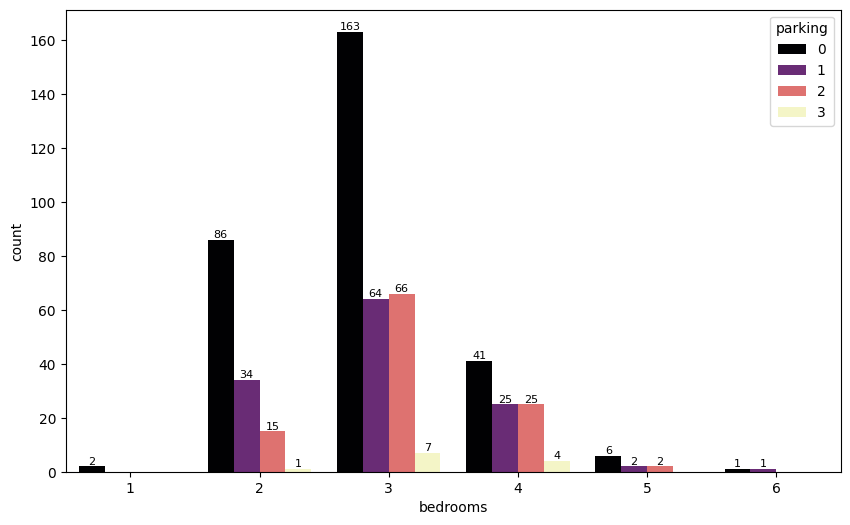

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="parking",palette="magma")
for i in range(len(df['parking'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)


plt.show()

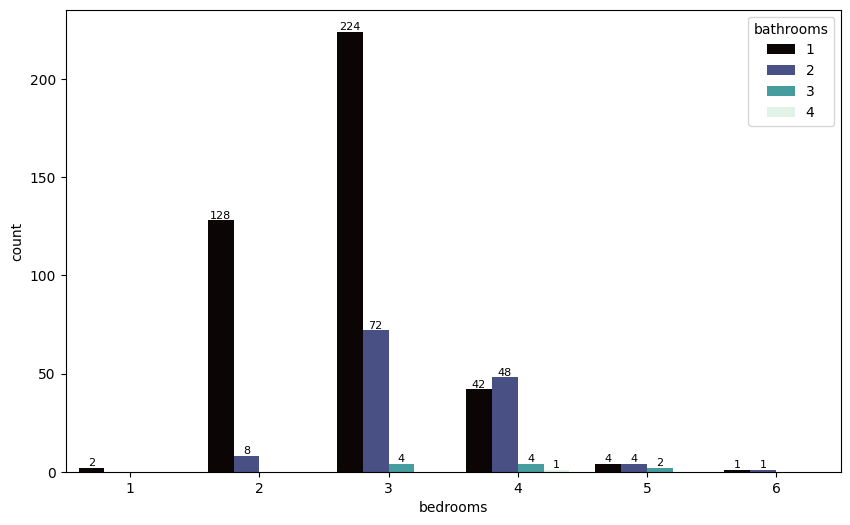

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="bathrooms",palette="mako")
for i in range(len(df['bathrooms'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.show()

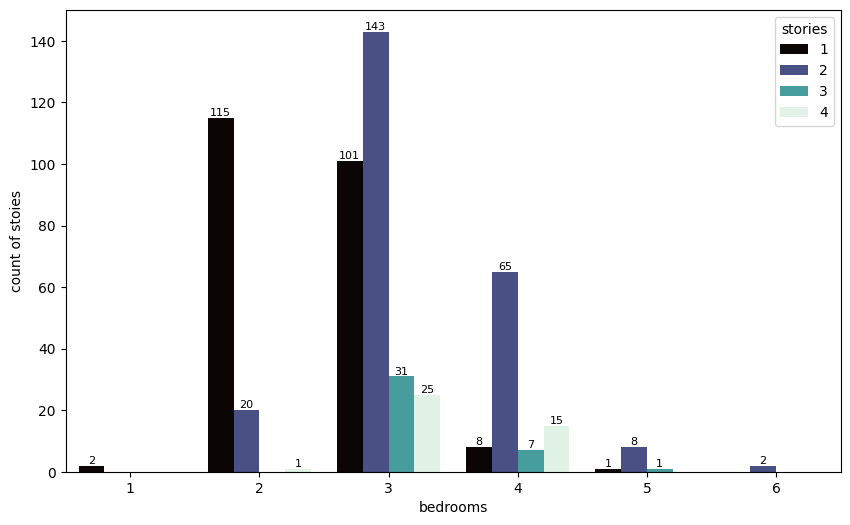

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="stories",palette="mako")
for i in range(len(df['stories'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of stoies')
plt.show()

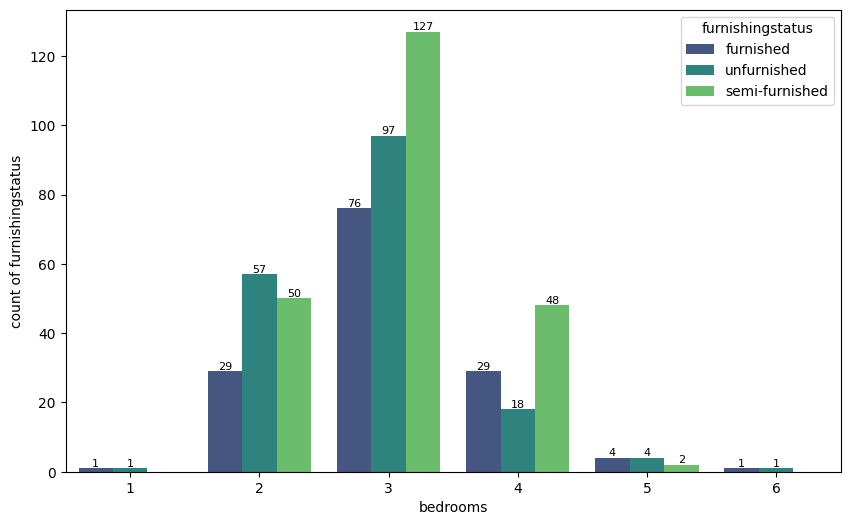

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="furnishingstatus",palette="viridis")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

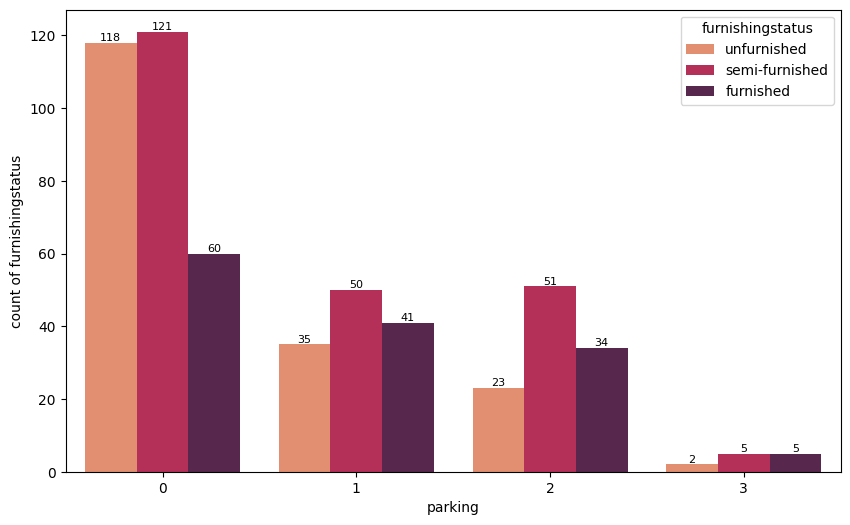

In [ ]:
ax = sns.countplot(df, x="parking", hue="furnishingstatus",palette="rocket_r")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

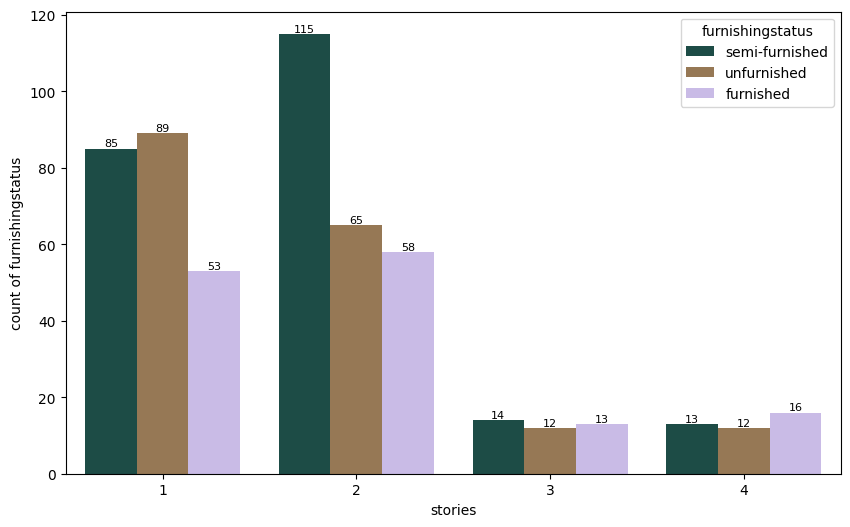

In [ ]:
ax = sns.countplot(df, x="stories", hue="furnishingstatus",palette="cubehelix")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

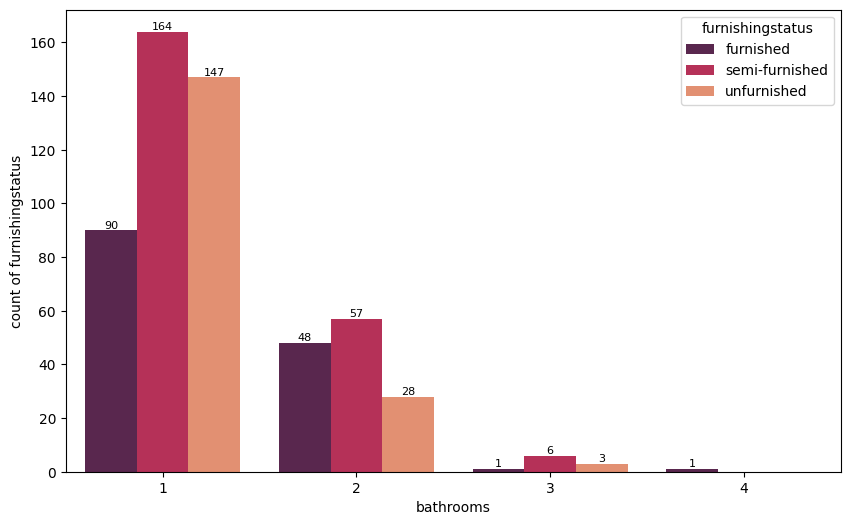

In [ ]:
ax = sns.countplot(df, x="bathrooms", hue="furnishingstatus",palette="rocket")
for i in range(len(df['furnishingstatus'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of furnishingstatus')
plt.show()

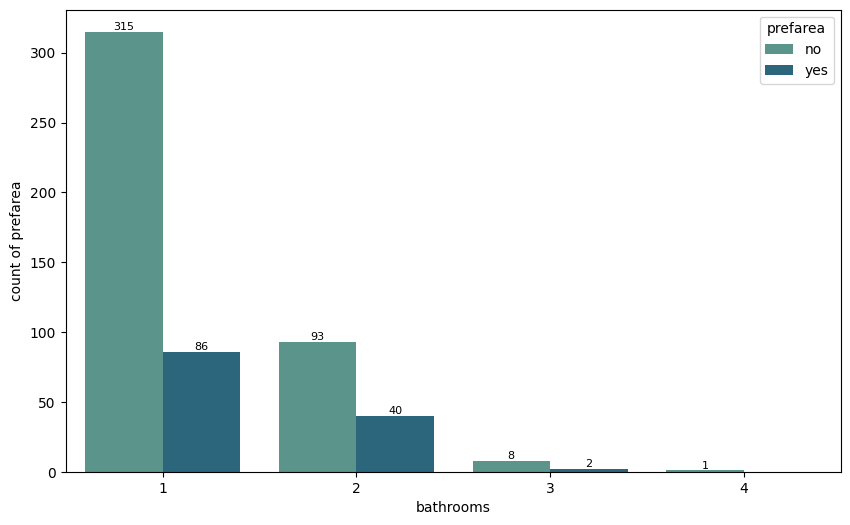

In [ ]:
ax = sns.countplot(df, x="bathrooms", hue="prefarea",palette="crest")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

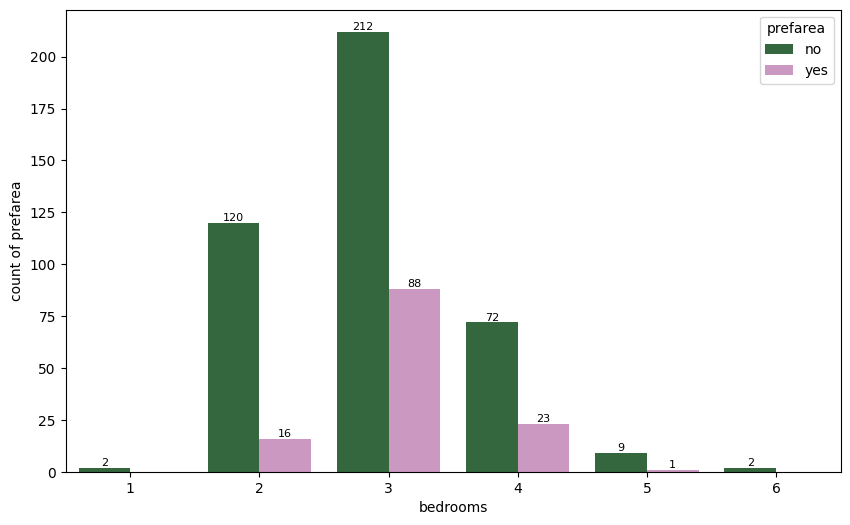

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="prefarea",palette="cubehelix")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

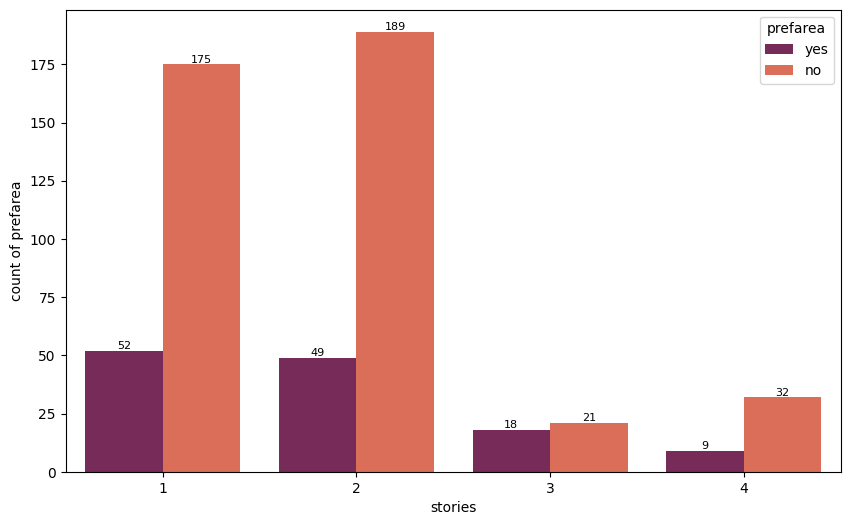

In [ ]:
ax = sns.countplot(df, x="stories", hue="prefarea",palette="rocket")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

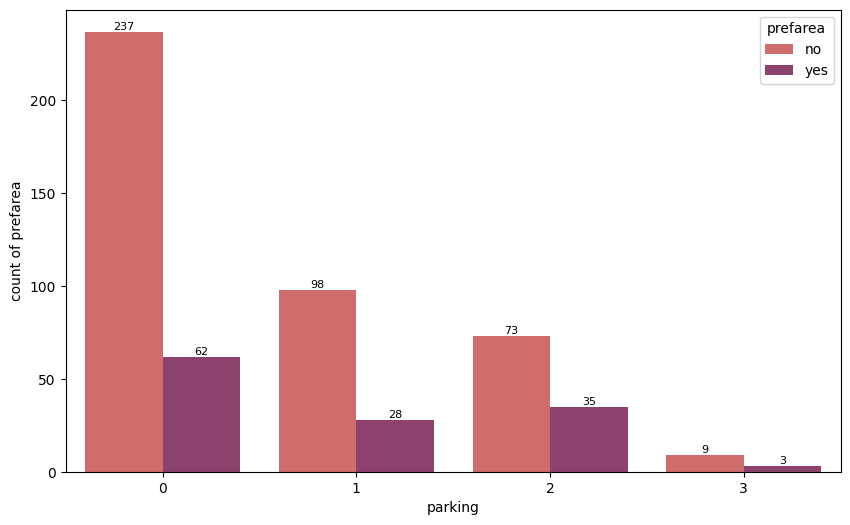

In [ ]:
ax = sns.countplot(df, x="parking", hue="prefarea",palette="flare")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.show()

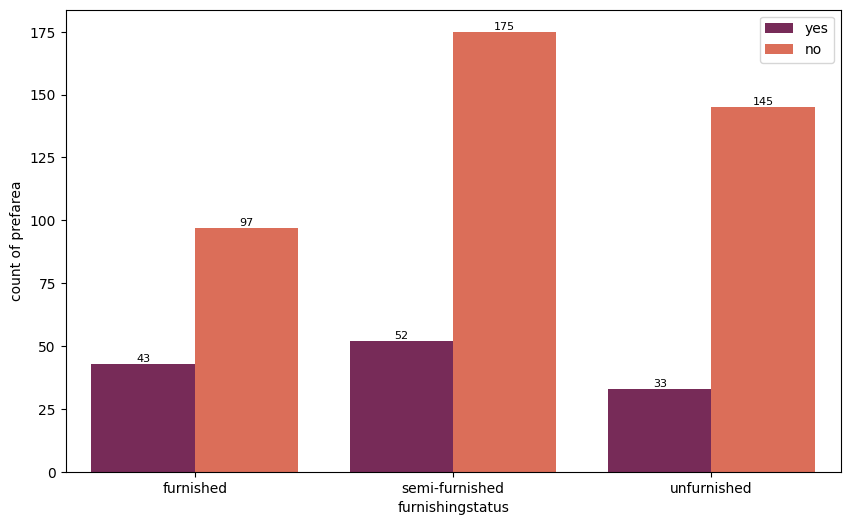

In [ ]:
ax = sns.countplot(df, x="furnishingstatus", hue="prefarea",palette="rocket")
for i in range(len(df['prefarea'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of prefarea')
plt.legend(loc = 'best')
plt.show()

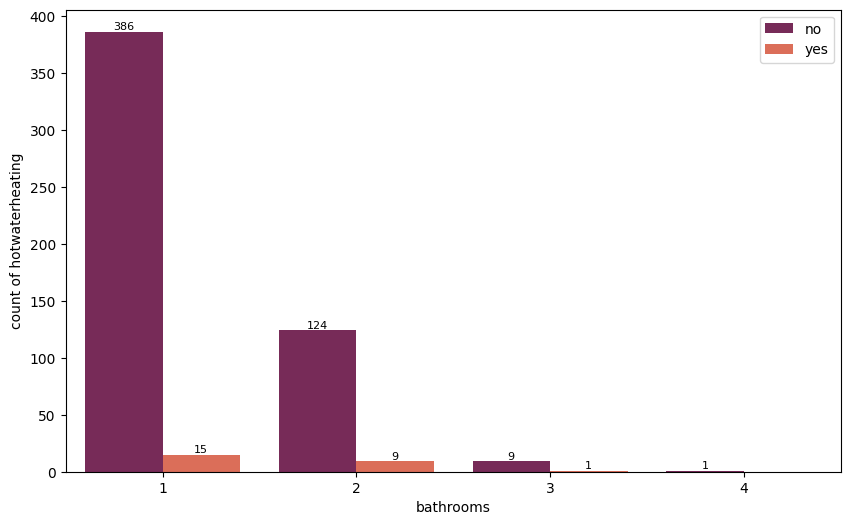

In [ ]:
ax = sns.countplot(df, x="bathrooms", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

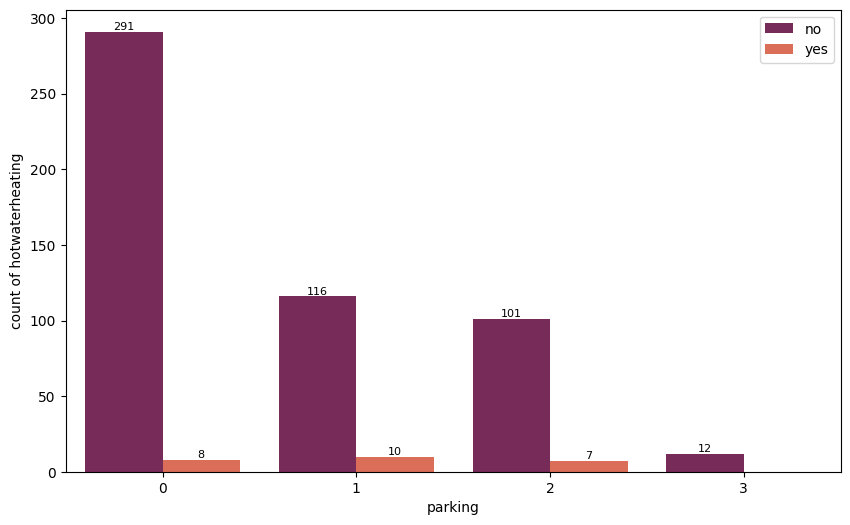

In [ ]:
ax = sns.countplot(df, x="parking", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

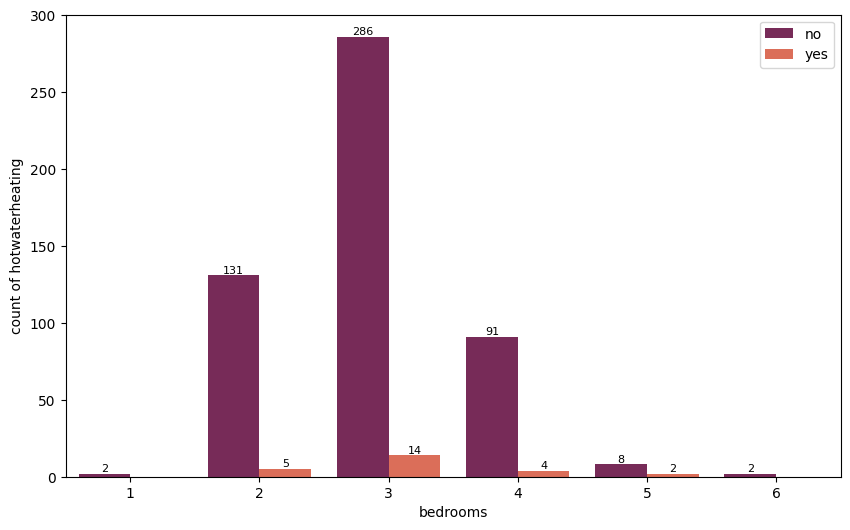

In [ ]:
ax = sns.countplot(df, x="bedrooms", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

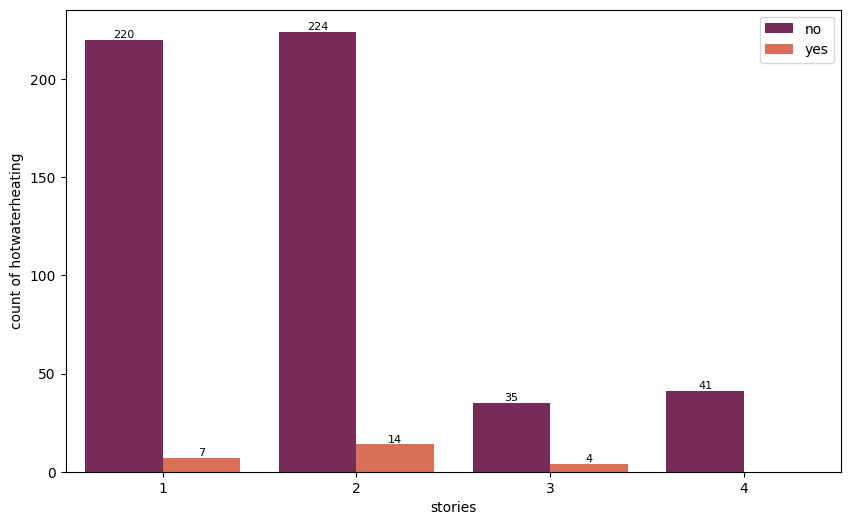

In [ ]:
ax = sns.countplot(df, x="stories", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

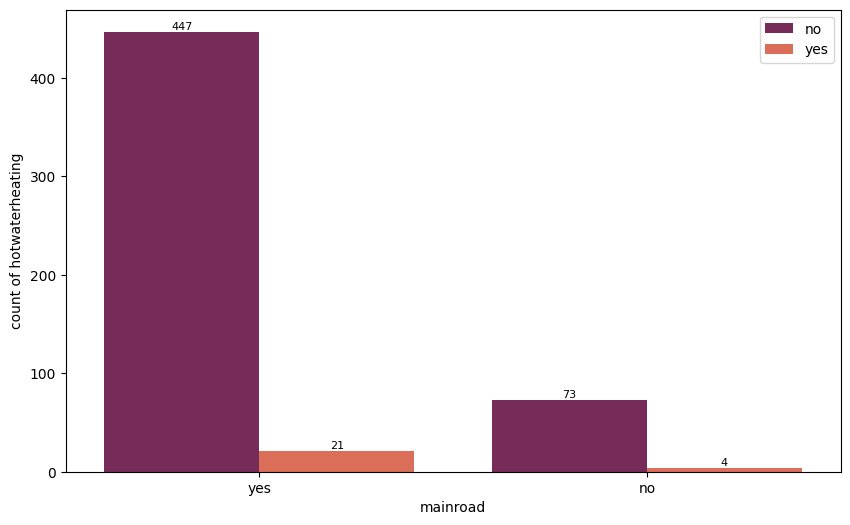

In [ ]:
ax = sns.countplot(df, x="mainroad", hue="hotwaterheating",palette="rocket")
for i in range(len(df['hotwaterheating'].unique())):
    ax.bar_label(ax.containers[i], fontsize=8)
plt.ylabel('count of hotwaterheating')
plt.legend(loc = 'best')
plt.show()

data encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
encoding_col = ['furnishingstatus','prefarea','airconditioning','hotwaterheating','basement','guestroom','mainroad']
for col in encoding_col:
    df[col]=encoder.fit_transform(df[col])

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


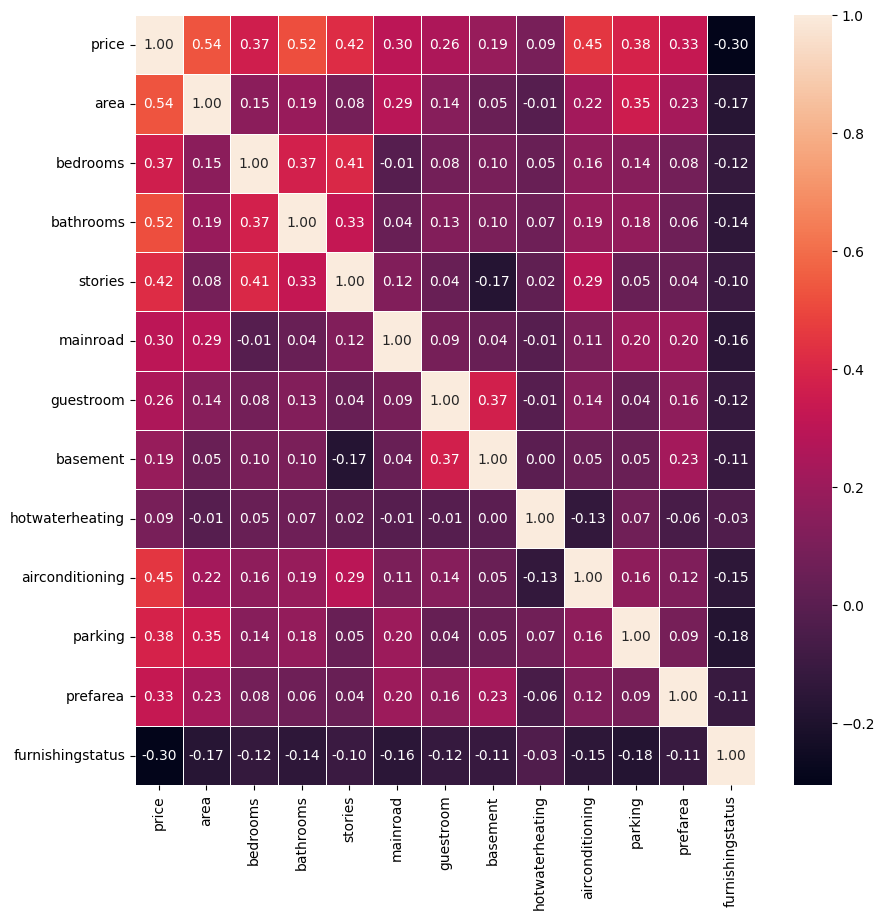

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5, cbar=True)
plt.show()

feature and target

In [ ]:
x=df.drop(columns=['price'],axis = 1)
y=df['price']

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

models

In [ ]:
ln_model = LinearRegression()
ln_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = ln_model.predict(x_test)

In [ ]:
ln_acc = r2_score(y_test, y_pred)
ln_acc

0.7624579467323475

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt_model.predict(x_test)

In [ ]:
dt_acc = r2_score(y_test, y_pred)
dt_acc

0.1619416028510421

RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf_model.predict(x_test)

In [ ]:
rf_acc = r2_score(y_test, y_pred)
rf_acc

0.7236133788362682

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR(kernel='linear')
svr_model.fit(x_train, y_train)

SVR(kernel='linear')

In [ ]:
y_pred = svr_model.predict(x_test)

In [ ]:
svr_acc = r2_score(y_test, y_pred)
svr_acc

0.7551452032057884

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

GradientBoostingRegressor

In [ ]:
gbr_model=GradientBoostingRegressor()
gbr_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gbr_model.predict(x_test)

In [ ]:
gbr_acc = r2_score(y_test, y_pred)
gbr_acc

0.6808421680288239

AdaBoostRegressor

In [ ]:
abr_model = AdaBoostRegressor()
abr_model.fit(x_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = abr_model.predict(x_test)

In [ ]:
abr_acc = r2_score(y_test, y_pred)
abr_acc

0.5796206197920462